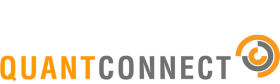
##Introduction to Financial Python [Tutorial 5]

##Métodos Numéricos
###Gustavo Alberto Puentes Romero

#Pandas-Resampling and DataFrame

##Introducción
En este capítulo aprenderemos sobre los métodos de remuestreo y el objeto DataFrame, que es una poderosa herramienta para el análisis de datos financieros.

##Recuperacion de datos
Aquí usamos la API de Quandl para recuperar datos.

In [1]:
!pip install quandl
import pandas as pd
import numpy as np
import quandl
quandl.ApiConfig.api_key = 'tnCnvFmEqC5qH9fr-2Ey'

Crearemos una Serie llamada "aapl" cuyos valores son los precios de cierre diarios de Apple, que por supuesto están indexados por fechas:

In [2]:
aapl_table = quandl.get('WIKI/AAPL')
aapl = aapl_table['Adj. Close']['2017']
print (aapl)

Date
2017-01-03    114.715378
2017-01-04    114.586983
2017-01-05    115.169696
2017-01-06    116.453639
2017-01-09    117.520300
                 ...    
2017-12-22    175.010000
2017-12-26    170.570000
2017-12-27    170.600000
2017-12-28    171.080000
2017-12-29    169.230000
Name: Adj. Close, Length: 249, dtype: float64


Recuerde que podemos obtener un punto de datos específico usando la serie ['aaaa-mm-dd']. También podemos obtener los datos de un mes específico mediante la serie ['aaaa-mm'].

In [3]:
print (aapl['2017-3'])

Date
2017-03-01    138.657681
2017-03-02    137.834404
2017-03-03    138.647762
2017-03-06    138.211326
2017-03-07    138.389868
2017-03-08    137.874080
2017-03-09    137.556672
2017-03-10    138.012946
2017-03-13    138.072460
2017-03-14    137.864161
2017-03-15    139.322254
2017-03-16    139.550391
2017-03-17    138.856061
2017-03-20    140.314154
2017-03-21    138.707276
2017-03-22    140.274478
2017-03-23    139.778528
2017-03-24    139.500796
2017-03-27    139.738852
2017-03-28    142.635200
2017-03-29    142.952608
2017-03-30    142.764147
2017-03-31    142.496334
Name: Adj. Close, dtype: float64


O en varios meses consecutivos:

In [4]:
aapl [ '2017-2' : '2017-4' ]

Date
2017-02-01    127.159749
2017-02-02    126.942467
2017-02-03    127.485673
2017-02-06    128.680728
2017-02-07    129.905412
                 ...    
2017-04-24    142.476496
2017-04-25    143.369205
2017-04-26    142.487208
2017-04-27    142.625281
2017-04-28    142.486415
Name: Adj. Close, Length: 61, dtype: float64

.head(N) y .tail(N) son métodos para acceder rápidamente al primer o último N elementos.

In [5]:
print (aapl.head())
print (aapl.tail(10))

Date
2017-01-03    114.715378
2017-01-04    114.586983
2017-01-05    115.169696
2017-01-06    116.453639
2017-01-09    117.520300
Name: Adj. Close, dtype: float64
Date
2017-12-15    173.87
2017-12-18    176.42
2017-12-19    174.54
2017-12-20    174.35
2017-12-21    175.01
2017-12-22    175.01
2017-12-26    170.57
2017-12-27    170.60
2017-12-28    171.08
2017-12-29    169.23
Name: Adj. Close, dtype: float64


##Remuestreo

series.resample(freq) es una clase llamada "DatetimeIndexResampler" que agrupa datos en un objeto Series en intervalos de tiempo regulares. El argumento "freq" determina la longitud de cada intervalo.

series.resample.mean()es una declaración completa que agrupa los datos en intervalos y luego calcula la media de cada intervalo. Por ejemplo, si queremos agregar los datos diarios en datos mensuales por media:

In [6]:
by_month = aapl.resample('M').mean()
print (by_month)

Date
2017-01-31    118.093136
2017-02-28    132.456268
2017-03-31    139.478802
2017-04-30    141.728436
2017-05-31    151.386305
2017-06-30    147.233064
2017-07-31    147.706190
2017-08-31    158.856375
2017-09-30    157.606500
2017-10-31    157.811627
2017-11-30    172.214500
2017-12-31    171.893100
Freq: M, Name: Adj. Close, dtype: float64


También podemos agregar los datos por semana:

In [7]:
by_week = aapl.resample('W').mean()
print (by_week.head())

Date
2017-01-08    115.231424
2017-01-15    117.755360
2017-01-22    118.461035
2017-01-29    119.667448
2017-02-05    124.313346
Freq: W-SUN, Name: Adj. Close, dtype: float64


Podemos elegir casi cualquier frecuencia usando el formato 'nf', donde 'n' es un número entero y 'f' es M para el mes, W para la semana y D para el día.

In [8]:
three_day = aapl.resample('3D').mean()
two_week  = aapl.resample('2W').mean()
two_month = aapl.resample('2M').mean()

Además del método mean(), también se pueden usar otros métodos con el remuestreador:

In [9]:
std = aapl.resample('W').std()    # standard deviation
max = aapl.resample('W').max()    # maximum value
min = aapl.resample('W').min()    # minimum value

A menudo queremos calcular los rendimientos mensuales de una acción, en función de los precios del último día de cada mes. Para obtener esos precios, usamos el método series.resample.agg ():

In [10]:
last_day = aapl.resample('M').agg(lambda x: x[-1])
print (last_day)

Date
2017-01-31    119.851150
2017-02-28    135.880362
2017-03-31    142.496334
2017-04-30    142.486415
2017-05-31    152.142689
2017-06-30    143.438008
2017-07-31    148.248489
2017-08-31    164.000000
2017-09-30    154.120000
2017-10-31    169.040000
2017-11-30    171.850000
2017-12-31    169.230000
Freq: M, Name: Adj. Close, dtype: float64


O calcule directamente las tasas de rendimiento mensuales utilizando los datos del primer día y del último día:

In [11]:
monthly_return = aapl.resample('M').agg(lambda x: x[-1]/x[1] - 1)
print (monthly_return)

Date
2017-01-31    0.045940
2017-02-28    0.070409
2017-03-31    0.033823
2017-04-30   -0.007736
2017-05-31    0.039829
2017-06-30   -0.073528
2017-07-31    0.033035
2017-08-31    0.047890
2017-09-30   -0.049112
2017-10-31    0.094252
2017-11-30    0.022247
2017-12-31   -0.003357
Freq: M, Name: Adj. Close, dtype: float64


El objeto Serie también nos proporciona algunos métodos convenientes para realizar cálculos rápidos.

In [12]:
print (monthly_return.mean())
print (monthly_return.std())
print (monthly_return.max())

0.02114094011940022
0.04775652864223314
0.09425168306576914


Otros dos métodos que se utilizan con frecuencia en Series son .diff() y .pct_change(). El primero calcula la diferencia entre elementos consecutivos y el segundo calcula el cambio porcentual.

In [13]:
print (last_day.diff())
print (last_day.pct_change())

Date
2017-01-31          NaN
2017-02-28    16.029211
2017-03-31     6.615972
2017-04-30    -0.009919
2017-05-31     9.656274
2017-06-30    -8.704681
2017-07-31     4.810482
2017-08-31    15.751511
2017-09-30    -9.880000
2017-10-31    14.920000
2017-11-30     2.810000
2017-12-31    -2.620000
Freq: M, Name: Adj. Close, dtype: float64
Date
2017-01-31         NaN
2017-02-28    0.133743
2017-03-31    0.048690
2017-04-30   -0.000070
2017-05-31    0.067770
2017-06-30   -0.057214
2017-07-31    0.033537
2017-08-31    0.106251
2017-09-30   -0.060244
2017-10-31    0.096808
2017-11-30    0.016623
2017-12-31   -0.015246
Freq: M, Name: Adj. Close, dtype: float64


Observe que indujimos un valor de NaN al calcular los cambios porcentuales, es decir, los retornos.

Cuando se trata de valores de NaN, normalmente eliminamos el punto de datos o lo rellenamos con un valor específico. Aquí lo llenamos con 0:

In [14]:
daily_return = (last_day.pct_change())
print (daily_return.fillna(0))

Date
2017-01-31    0.000000
2017-02-28    0.133743
2017-03-31    0.048690
2017-04-30   -0.000070
2017-05-31    0.067770
2017-06-30   -0.057214
2017-07-31    0.033537
2017-08-31    0.106251
2017-09-30   -0.060244
2017-10-31    0.096808
2017-11-30    0.016623
2017-12-31   -0.015246
Freq: M, Name: Adj. Close, dtype: float64


Alternativamente, podemos llenar un NaN con el siguiente valor ajustado. Esto se llama 'relleno hacia atrás', o 'bfill' en resumen:

In [15]:
daily_return = last_day.pct_change()
print (daily_return.fillna(method = 'bfill'))

Date
2017-01-31    0.133743
2017-02-28    0.133743
2017-03-31    0.048690
2017-04-30   -0.000070
2017-05-31    0.067770
2017-06-30   -0.057214
2017-07-31    0.033537
2017-08-31    0.106251
2017-09-30   -0.060244
2017-10-31    0.096808
2017-11-30    0.016623
2017-12-31   -0.015246
Freq: M, Name: Adj. Close, dtype: float64


Como era de esperar, dado que existe un método de 'relleno hacia atrás', debe haber un método de 'relleno hacia adelante', o 'ffill' para abreviar. Sin embargo, no podemos usarlo aquí porque el NaN es el primer valor.

También podemos simplemente eliminar los valores de NaN mediante **.dropna()**

In [16]:
daily_return = last_day.pct_change().dropna()
print (daily_return)

Date
2017-02-28    0.133743
2017-03-31    0.048690
2017-04-30   -0.000070
2017-05-31    0.067770
2017-06-30   -0.057214
2017-07-31    0.033537
2017-08-31    0.106251
2017-09-30   -0.060244
2017-10-31    0.096808
2017-11-30    0.016623
2017-12-31   -0.015246
Freq: M, Name: Adj. Close, dtype: float64


##DataFrame

El **DataFrame** es la estructura de datos más utilizada en Pandas. Es esencialmente una tabla, como una hoja de cálculo de Excel.

Más precisamente, un DataFrame es una colección de objetos Series, cada uno de los cuales puede contener diferentes tipos de datos. Se puede crear un DataFrame a partir de varios tipos de datos: diccionario, numpy.ndarray 2-D, una serie u otro DataFrame.


###Crear Dataframes

El método más común para crear un DataFrame es pasar un diccionario:

In [17]:
dict = {'AAPL': [143.5,  144.09, 142.73, 144.18, 143.77],
        'GOOG': [898.7,  911.71, 906.69, 918.59, 926.99],
        'IBM':  [155.58, 153.67, 152.36, 152.94, 153.49]}
dates = pd.date_range('2017-07-03', periods = 5, freq = 'D')
df = pd.DataFrame(dict, index = dates)
print (df)

              AAPL    GOOG     IBM
2017-07-03  143.50  898.70  155.58
2017-07-04  144.09  911.71  153.67
2017-07-05  142.73  906.69  152.36
2017-07-06  144.18  918.59  152.94
2017-07-07  143.77  926.99  153.49


###Manipulación de DataFrames
Podemos buscar valores en un DataFrame por columnas e índice. Cada columna de un DataFrame es esencialmente una serie Pandas. Podemos buscar una columna entre corchetes: **df['column_name']**

Si el nombre de una columna no contiene espacios, también podemos usar df.column_name para buscar una columna

In [18]:
df = aapl_table
print (df.Close.tail(5))
print (df['Adj. Volume'].tail(5))

Date
2018-03-21    171.270
2018-03-22    168.845
2018-03-23    164.940
2018-03-26    172.770
2018-03-27    168.340
Name: Close, dtype: float64
Date
2018-03-21    35247358.0
2018-03-22    41051076.0
2018-03-23    40248954.0
2018-03-26    36272617.0
2018-03-27    38962839.0
Name: Adj. Volume, dtype: float64


Todos los métodos que aplicamos a un índice de serie, como iloc [], loc [] y métodos de remuestreo, también se pueden aplicar a un DataFrame:

In [19]:
aapl_2016 = df['2016']
aapl_month = aapl_2016.resample('M').agg(lambda x: x[-1])
print (aapl_month)

              Open      High     Low  ...    Adj. Low  Adj. Close  Adj. Volume
Date                                  ...                                     
2016-01-31   94.79   97.3400   94.35  ...   91.156128   94.044912   64416504.0
2016-02-29   96.86   98.2300   96.65  ...   93.880927   93.919781   35216277.0
2016-03-31  109.72  109.9000  108.88  ...  105.760531  105.867380   25888449.0
2016-04-30   93.99   94.7200   92.51  ...   89.859540   91.054300   68531478.0
2016-05-31   99.60  100.4000   98.82  ...   96.575559   97.591939   42307212.0
2016-06-30   94.44   95.7700   94.30  ...   92.158220   93.428693   35836356.0
2016-07-31  104.19  104.5500  103.68  ...  101.325177  101.843140   27733688.0
2016-08-31  105.66  106.5699  105.64  ...  103.796505  104.248477   29662406.0
2016-09-30  112.46  113.3700  111.80  ...  109.849008  111.077195   36379106.0
2016-10-31  113.65  114.2300  113.20  ...  111.224577  111.558644   26419398.0
2016-11-30  111.56  112.2000  110.27  ...  108.90800

Podemos seleccionar ciertas columnas de un DataFrame usando sus nombres:

In [20]:
aapl_bar = aapl_month[['Open', 'High', 'Low', 'Close']]
print (aapl_bar)

              Open      High     Low   Close
Date                                        
2016-01-31   94.79   97.3400   94.35   97.34
2016-02-29   96.86   98.2300   96.65   96.69
2016-03-31  109.72  109.9000  108.88  108.99
2016-04-30   93.99   94.7200   92.51   93.74
2016-05-31   99.60  100.4000   98.82   99.86
2016-06-30   94.44   95.7700   94.30   95.60
2016-07-31  104.19  104.5500  103.68  104.21
2016-08-31  105.66  106.5699  105.64  106.10
2016-09-30  112.46  113.3700  111.80  113.05
2016-10-31  113.65  114.2300  113.20  113.54
2016-11-30  111.56  112.2000  110.27  110.52
2016-12-31  116.65  117.2000  115.43  115.82


Incluso podemos especificar tanto filas como columnas usando loc []. Los índices de fila y los nombres de columna están separados por una coma:

In [21]:
print (aapl_month.loc['2016-03':'2016-06', ['Open', 'High', 'Low', 'Close']])

              Open    High     Low   Close
Date                                      
2016-03-31  109.72  109.90  108.88  108.99
2016-04-30   93.99   94.72   92.51   93.74
2016-05-31   99.60  100.40   98.82   99.86
2016-06-30   94.44   95.77   94.30   95.60


Los métodos de subconjunto en DataFrame son bastante útiles. Al escribir declaraciones lógicas entre corchetes, podemos crear subconjuntos personalizados:

In [22]:
above = aapl_bar[aapl_bar.Close > np.mean(aapl_bar.Close)]
print (above)

              Open      High     Low   Close
Date                                        
2016-03-31  109.72  109.9000  108.88  108.99
2016-08-31  105.66  106.5699  105.64  106.10
2016-09-30  112.46  113.3700  111.80  113.05
2016-10-31  113.65  114.2300  113.20  113.54
2016-11-30  111.56  112.2000  110.27  110.52
2016-12-31  116.65  117.2000  115.43  115.82


###Validación de datos

Como se mencionó, todos los métodos que se aplican a una serie también se pueden aplicar a un DataFrame. Aquí agregamos una nueva columna a un DataFrame existente:

In [23]:
aapl_bar['rate_return'] = aapl_bar.Close.pct_change()
print (aapl_bar)

              Open      High     Low   Close  rate_return
Date                                                     
2016-01-31   94.79   97.3400   94.35   97.34          NaN
2016-02-29   96.86   98.2300   96.65   96.69    -0.006678
2016-03-31  109.72  109.9000  108.88  108.99     0.127211
2016-04-30   93.99   94.7200   92.51   93.74    -0.139921
2016-05-31   99.60  100.4000   98.82   99.86     0.065287
2016-06-30   94.44   95.7700   94.30   95.60    -0.042660
2016-07-31  104.19  104.5500  103.68  104.21     0.090063
2016-08-31  105.66  106.5699  105.64  106.10     0.018136
2016-09-30  112.46  113.3700  111.80  113.05     0.065504
2016-10-31  113.65  114.2300  113.20  113.54     0.004334
2016-11-30  111.56  112.2000  110.27  110.52    -0.026599
2016-12-31  116.65  117.2000  115.43  115.82     0.047955


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Aquí el cálculo introdujo un valor de NaN. Si el DataFrame es grande, no podríamos observarlo. isnull () proporciona una forma conveniente de verificar valores anormales.

In [24]:
missing = aapl_bar.isnull()
print (missing)
print ('---------------------------------------------')
print (missing.describe())

             Open   High    Low  Close  rate_return
Date                                               
2016-01-31  False  False  False  False         True
2016-02-29  False  False  False  False        False
2016-03-31  False  False  False  False        False
2016-04-30  False  False  False  False        False
2016-05-31  False  False  False  False        False
2016-06-30  False  False  False  False        False
2016-07-31  False  False  False  False        False
2016-08-31  False  False  False  False        False
2016-09-30  False  False  False  False        False
2016-10-31  False  False  False  False        False
2016-11-30  False  False  False  False        False
2016-12-31  False  False  False  False        False
---------------------------------------------
         Open   High    Low  Close rate_return
count      12     12     12     12          12
unique      1      1      1      1           2
top     False  False  False  False       False
freq       12     12     12     12    

La fila etiquetada como "único" indica el número de valores únicos en cada columna. Dado que la columna "rate_return" tiene 2 valores únicos, tiene al menos un valor faltante.

Podemos deducir el número de valores perdidos comparando "count" con "freq". Hay 12 recuentos y 11 valores falsos, por lo que hay un valor verdadero que corresponde al valor perdido.

También podemos encontrar fácilmente las filas con valores perdidos:

In [25]:
print (missing[missing.rate_return == True])

             Open   High    Low  Close  rate_return
Date                                               
2016-01-31  False  False  False  False         True


Por lo general, cuando se trata de datos faltantes, eliminamos toda la fila o la llenamos con algún valor. Como presentamos en el capítulo Series, el mismo método dropna () y fillna () se puede aplicar a un DataFrame.

In [26]:
drop = aapl_bar.dropna()
print (drop)
print ('\n--------------------------------------------------\n')
fill = aapl_bar.fillna(0)
print (fill)

              Open      High     Low   Close  rate_return
Date                                                     
2016-02-29   96.86   98.2300   96.65   96.69    -0.006678
2016-03-31  109.72  109.9000  108.88  108.99     0.127211
2016-04-30   93.99   94.7200   92.51   93.74    -0.139921
2016-05-31   99.60  100.4000   98.82   99.86     0.065287
2016-06-30   94.44   95.7700   94.30   95.60    -0.042660
2016-07-31  104.19  104.5500  103.68  104.21     0.090063
2016-08-31  105.66  106.5699  105.64  106.10     0.018136
2016-09-30  112.46  113.3700  111.80  113.05     0.065504
2016-10-31  113.65  114.2300  113.20  113.54     0.004334
2016-11-30  111.56  112.2000  110.27  110.52    -0.026599
2016-12-31  116.65  117.2000  115.43  115.82     0.047955

--------------------------------------------------

              Open      High     Low   Close  rate_return
Date                                                     
2016-01-31   94.79   97.3400   94.35   97.34     0.000000
2016-02-29   96.86 

### DataFrame Concat

Hemos visto cómo extraer una serie de un marco de datos. Ahora debemos considerar cómo fusionar una serie o un DataFrame en otro.

En Pandas, la función concat() nos permite fusionar varias Series en un DataFrame:

In [27]:
s1 = pd.Series([143.5, 144.09, 142.73, 144.18, 143.77], name = 'AAPL')
s2 = pd.Series([898.7, 911.71, 906.69, 918.59, 926.99], name = 'GOOG')
data_frame = pd.concat([s1, s2], axis = 1)
print (data_frame)

     AAPL    GOOG
0  143.50  898.70
1  144.09  911.71
2  142.73  906.69
3  144.18  918.59
4  143.77  926.99


El parámetro "axis = 1" unirá dos DataFrames por columnas:

In [28]:
log_price = np.log(aapl_bar.Close)
log_price.name = 'log_price'
print (log_price)
print ('\n--------------------------------------------\n')
concat = pd.concat([aapl_bar, log_price], axis = 1)
print (concat)

Date
2016-01-31    4.578210
2016-02-29    4.571510
2016-03-31    4.691256
2016-04-30    4.540525
2016-05-31    4.603769
2016-06-30    4.560173
2016-07-31    4.646408
2016-08-31    4.664382
2016-09-30    4.727830
2016-10-31    4.732155
2016-11-30    4.705197
2016-12-31    4.752037
Freq: M, Name: log_price, dtype: float64

--------------------------------------------

              Open      High     Low   Close  rate_return  log_price
Date                                                                
2016-01-31   94.79   97.3400   94.35   97.34          NaN   4.578210
2016-02-29   96.86   98.2300   96.65   96.69    -0.006678   4.571510
2016-03-31  109.72  109.9000  108.88  108.99     0.127211   4.691256
2016-04-30   93.99   94.7200   92.51   93.74    -0.139921   4.540525
2016-05-31   99.60  100.4000   98.82   99.86     0.065287   4.603769
2016-06-30   94.44   95.7700   94.30   95.60    -0.042660   4.560173
2016-07-31  104.19  104.5500  103.68  104.21     0.090063   4.646408
2016-08-31

También podemos unir dos DataFrames por filas. Considere estos dos DataFrames:

In [29]:
df_volume = aapl_table.loc['2016-10':'2017-04', ['Volume', 'Split Ratio']].resample('M').agg(lambda x: x[-1])
print (df_volume)
print ('\n-------------------------------------------\n')
df_2017 = aapl_table.loc['2016-10':'2017-04', ['Open', 'High', 'Low', 'Close']].resample('M').agg(lambda x: x[-1])
print (df_2017)

                Volume  Split Ratio
Date                               
2016-10-31  26419398.0          1.0
2016-11-30  36162258.0          1.0
2016-12-31  30586265.0          1.0
2017-01-31  49200993.0          1.0
2017-02-28  23482860.0          1.0
2017-03-31  19661651.0          1.0
2017-04-30  20247187.0          1.0

-------------------------------------------

              Open     High     Low   Close
Date                                       
2016-10-31  113.65  114.230  113.20  113.54
2016-11-30  111.56  112.200  110.27  110.52
2016-12-31  116.65  117.200  115.43  115.82
2017-01-31  121.15  121.390  120.62  121.35
2017-02-28  137.08  137.435  136.70  136.99
2017-03-31  143.72  144.270  143.01  143.66
2017-04-30  144.09  144.300  143.27  143.65


Ahora fusionamos los DataFrames con nuestro DataFrame 'aapl_bar'

In [30]:
concat = pd.concat([aapl_bar, df_volume], axis = 1)
print (concat)

              Open      High     Low  ...  rate_return      Volume  Split Ratio
Date                                  ...                                      
2016-01-31   94.79   97.3400   94.35  ...          NaN         NaN          NaN
2016-02-29   96.86   98.2300   96.65  ...    -0.006678         NaN          NaN
2016-03-31  109.72  109.9000  108.88  ...     0.127211         NaN          NaN
2016-04-30   93.99   94.7200   92.51  ...    -0.139921         NaN          NaN
2016-05-31   99.60  100.4000   98.82  ...     0.065287         NaN          NaN
2016-06-30   94.44   95.7700   94.30  ...    -0.042660         NaN          NaN
2016-07-31  104.19  104.5500  103.68  ...     0.090063         NaN          NaN
2016-08-31  105.66  106.5699  105.64  ...     0.018136         NaN          NaN
2016-09-30  112.46  113.3700  111.80  ...     0.065504         NaN          NaN
2016-10-31  113.65  114.2300  113.20  ...     0.004334  26419398.0          1.0
2016-11-30  111.56  112.2000  110.27  ..

De forma predeterminada, los DataFrame se unen con todos los datos. Esta opción predeterminada da como resultado una pérdida de información cero. También podemos fusionarlos por intersección, esto se llama 'unión interna':

In [31]:
concat = pd.concat([aapl_bar, df_volume], axis = 1, join = 'inner')
print (concat)

              Open    High     Low  ...  rate_return      Volume  Split Ratio
Date                                ...                                      
2016-10-31  113.65  114.23  113.20  ...     0.004334  26419398.0          1.0
2016-11-30  111.56  112.20  110.27  ...    -0.026599  36162258.0          1.0
2016-12-31  116.65  117.20  115.43  ...     0.047955  30586265.0          1.0

[3 rows x 7 columns]


Solo se dejó la parte de la intersección si se usa el método de 'unión interna'. Ahora intentemos agregar un DataFrame a otro:

In [32]:
append = aapl_bar.append(df_2017)
print (append)

              Open      High     Low   Close  rate_return
Date                                                     
2016-01-31   94.79   97.3400   94.35   97.34          NaN
2016-02-29   96.86   98.2300   96.65   96.69    -0.006678
2016-03-31  109.72  109.9000  108.88  108.99     0.127211
2016-04-30   93.99   94.7200   92.51   93.74    -0.139921
2016-05-31   99.60  100.4000   98.82   99.86     0.065287
2016-06-30   94.44   95.7700   94.30   95.60    -0.042660
2016-07-31  104.19  104.5500  103.68  104.21     0.090063
2016-08-31  105.66  106.5699  105.64  106.10     0.018136
2016-09-30  112.46  113.3700  111.80  113.05     0.065504
2016-10-31  113.65  114.2300  113.20  113.54     0.004334
2016-11-30  111.56  112.2000  110.27  110.52    -0.026599
2016-12-31  116.65  117.2000  115.43  115.82     0.047955
2016-10-31  113.65  114.2300  113.20  113.54          NaN
2016-11-30  111.56  112.2000  110.27  110.52          NaN
2016-12-31  116.65  117.2000  115.43  115.82          NaN
2017-01-31  12

'Append' es esencialmente para concatizar dos DataFrames por eje = 0, por lo tanto, aquí hay una forma alternativa de agregar:

In [33]:
concat = pd.concat([aapl_bar, df_2017], axis = 0)
print (concat)

              Open      High     Low   Close  rate_return
Date                                                     
2016-01-31   94.79   97.3400   94.35   97.34          NaN
2016-02-29   96.86   98.2300   96.65   96.69    -0.006678
2016-03-31  109.72  109.9000  108.88  108.99     0.127211
2016-04-30   93.99   94.7200   92.51   93.74    -0.139921
2016-05-31   99.60  100.4000   98.82   99.86     0.065287
2016-06-30   94.44   95.7700   94.30   95.60    -0.042660
2016-07-31  104.19  104.5500  103.68  104.21     0.090063
2016-08-31  105.66  106.5699  105.64  106.10     0.018136
2016-09-30  112.46  113.3700  111.80  113.05     0.065504
2016-10-31  113.65  114.2300  113.20  113.54     0.004334
2016-11-30  111.56  112.2000  110.27  110.52    -0.026599
2016-12-31  116.65  117.2000  115.43  115.82     0.047955
2016-10-31  113.65  114.2300  113.20  113.54          NaN
2016-11-30  111.56  112.2000  110.27  110.52          NaN
2016-12-31  116.65  117.2000  115.43  115.82          NaN
2017-01-31  12

Tenga en cuenta que si los dos DataFrame tienen algunas columnas con los mismos nombres de columna, estas columnas se consideran iguales y se fusionarán. Es muy importante tener los nombres de columna correctos. Si cambiamos el nombre de una columna aquí:

In [34]:
df_2017.columns = ['Change', 'High', 'Low', 'Close']
concat = pd.concat([aapl_bar, df_2017], axis = 0)
print (concat)

              Open      High     Low   Close  rate_return  Change
Date                                                             
2016-01-31   94.79   97.3400   94.35   97.34          NaN     NaN
2016-02-29   96.86   98.2300   96.65   96.69    -0.006678     NaN
2016-03-31  109.72  109.9000  108.88  108.99     0.127211     NaN
2016-04-30   93.99   94.7200   92.51   93.74    -0.139921     NaN
2016-05-31   99.60  100.4000   98.82   99.86     0.065287     NaN
2016-06-30   94.44   95.7700   94.30   95.60    -0.042660     NaN
2016-07-31  104.19  104.5500  103.68  104.21     0.090063     NaN
2016-08-31  105.66  106.5699  105.64  106.10     0.018136     NaN
2016-09-30  112.46  113.3700  111.80  113.05     0.065504     NaN
2016-10-31  113.65  114.2300  113.20  113.54     0.004334     NaN
2016-11-30  111.56  112.2000  110.27  110.52    -0.026599     NaN
2016-12-31  116.65  117.2000  115.43  115.82     0.047955     NaN
2016-10-31     NaN  114.2300  113.20  113.54          NaN  113.65
2016-11-30

Dado que se ha cambiado el nombre de la columna 'Open', el nuevo DataFrame tiene una nueva columna llamada 'Cambiar'.

#Resumen
Presentamos la parte más importante de Python: remuestreo y manipulación de DataFrame. Solo presentamos el método más utilizado en el análisis de datos financieros. Sin embargo, también hay muchos métodos utilizados en la minería de datos, que también son beneficiosos.